In [1]:
#Importing all required files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
!pip install statsmodels --user

In [2]:
#Getting the file and removing all invalid values
df = pd.read_csv('cardio_train.csv', sep=';')
df=df[(df['ap_hi']<200) & (df['ap_lo']<200) & (df['ap_lo']>0) & (df['ap_hi']>0)]

In [3]:
# Creating all the functions that are required to get 95% confidence Interval
def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)
    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))
    
def CI_prop(s, n):
    p = s / n
    se2 = p * (1-p) / n
    se = np.sqrt(se2)
    low = p - 1.96 * se
    up = p + 1.96 * se
    print('Sample proportion is:', p)
    print('95% CI is: ({}, {})'.format(low, up))
    
def CI_prop_diff(s1, s2, n1, n2):
    p1 = s1 / n1
    p2 = s2 / n2
    se2p1 = p1 * (1 - p1) / n1
    se2p2 = p2 * (1 - p2) / n2
    se2 = se2p1 + se2p2
    se = np.sqrt(se2)
    low = (p1 - p2) - 1.96 * se
    up = (p1 - p2) + 1.96 * se
    print("Proportion difference is:", p1 - p2)
    print("95% CI is: ({}, {})".format(low, up))
    

In [4]:
#Finding correlation between Systolic and Diabolic

corr = stats.pearsonr(df['ap_hi'], df['ap_lo'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: 0.6415958517723366
p-value: 0.0


In [5]:
#Creating the linear regression model for systolic and diabolic

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = df['ap_hi']
y_vals = df['ap_lo']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ap_lo   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                 4.816e+04
Date:                Wed, 23 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:16:04   Log-Likelihood:            -2.3563e+05
No. Observations:               68836   AIC:                         4.713e+05
Df Residuals:                   68834   BIC:                         4.713e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0608      0.208    173.375      0.000      35.653      36.468
ap_hi          0.3585      0.002    219.454      0.000       0.355       0.362
==============================================================================
Omnibus:                    27736.376   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1446856.296
Skew:                           1.172   Prob(JB):                         0.00
Kurtosis:                      25.337   Cond. No.                         937.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

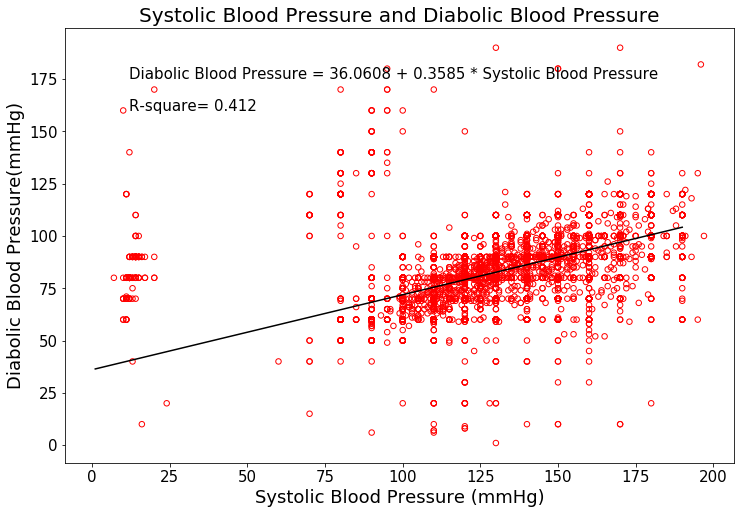

In [6]:
#Creating the scatterplot for systolic and diabolic

import matplotlib.pyplot as plt
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(df['ap_lo']),
                     np.max(df['ap_lo']), 100)
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df['ap_hi'], df['ap_lo'], c='none',
            edgecolors='red', s=30)
axs.plot(x_plot, x_plot*b1 + b0, color='black')
plt.title("Male height vs weight", fontsize=20)
plt.title("Systolic Blood Pressure and Diabolic Blood Pressure", fontsize=20)
axs.set_xlabel("Systolic Blood Pressure (mmHg)", fontsize=18)
axs.set_ylabel("Diabolic Blood Pressure(mmHg)", fontsize=18)
axs.tick_params(labelsize=15)
plt.text(12,175, "Diabolic Blood Pressure = 36.0608 + 0.3585 * Systolic Blood Pressure", size=15)
plt.text(12,160, "R-square= 0.412",size=15)
plt.show()

In [7]:
#Creating a function to get normal and not normal chl
def chl(row):
    if row['cholesterol']==1:
        return 0
    else:
        return 1
    
df['HighChl']=df.apply(chl,axis=1)

In [8]:
# Creating a table between cholesterol and Cardiovascular and printing 95%CI

table1 = pd.crosstab(index=df["HighChl"], columns=df["cardio"])
CI_prop_diff(22478,11537,51670,17166)
CI_prop(22478,51670)
CI_prop(11537,17166)

#Printing the chi-square and P values

chi2, p, dof, expected = stats.chi2_contingency(table1)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)


Proportion difference is: -0.2370543547257586
95% CI is: (-0.24527591317822495, -0.22883279627329223)
Sample proportion is: 0.435029998064641
95% CI is: (0.43075526364926786, 0.4393047324800141)
Sample proportion is: 0.6720843527903996
95% CI is: (0.6650614852090375, 0.6791072203717616)
chi2: 2895.7773255561638
p: 0.0
dof: 1
expected: [[26137.50174327 25532.49825673]
 [ 8683.49825673  8482.50174327]]


In [9]:
#Getting the Cardiovascular and No Cardiovascular Probablity
table1['Total'] = table1[0] + table1[1]
table1['cardio_per'] = table1[1] / table1['Total']
table1['nocard_per'] = table1[0]/table1['Total']
table1

cardio,0,1,Total,cardio_per,nocard_per
HighChl,,,,,
0,29192,22478,51670,0.435030,0.564970
1,5629,11537,17166,0.672084,0.327916


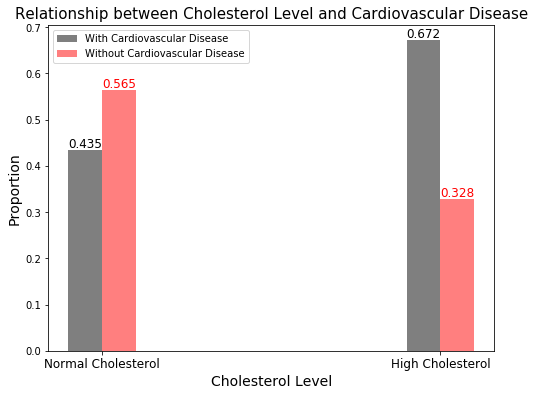

In [10]:
#Making the grouped bar charts with labels

per1=['0.435','0.672']
per2=['0.565','0.328']

labels = ['Normal Cholesterol','High Cholesterol']
y_value1 = table1['cardio_per']
y_value2 = table1['nocard_per']


x = np.arange(len(labels))
width = 0.1  

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x - width/2, y_value1, width, label='With Cardiovascular Disease', color='black', alpha=0.5)
ax.bar(x + width/2, y_value2, width, label='Without Cardiovascular Disease', color='r',alpha=0.5)


ax.set_ylabel('Proportion', fontsize=14)
ax.set_xlabel('Cholesterol Level', fontsize=14)
ax.set_title('Relationship between Cholesterol Level and Cardiovascular Disease'
             ,fontsize=15)

for i in range(2):
    plt.text(i-0.10, y_value1[i]+0.005, str(per1[i]), color='black', size=12)

for i in range(2):
    plt.text(i, y_value2[i]+0.005, str(per2[i]), color='red', size=12, alpha=1)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()
plt.show()

In [11]:
# Creating a table between smoke and Cardiovascular and printing 95%CI
table2 = pd.crosstab(index=df["smoke"], columns=df["cardio"])
CI_prop_diff(2820,31195,6036,62800)
CI_prop(31195,62800)
CI_prop(2820,6036)

#Printing the chi-square and P values
chi2, p, dof, expected = stats.chi2_contingency(table2)

print("chi2:", chi2)
print("p:", p)
print("dof:", dof)
print("expected:", expected)

Proportion difference is: -0.0295388497043218
95% CI is: (-0.042719118574223225, -0.016358580834420378)
Sample proportion is: 0.4967356687898089
95% CI is: (0.49282512639895265, 0.5006462111806652)
Sample proportion is: 0.4671968190854871
95% CI is: (0.4546100345202294, 0.4797836036507448)
chi2: 19.104070727740993
p: 1.2378059260746674e-05
dof: 1
expected: [[31767.66226974 31032.33773026]
 [ 3053.33773026  2982.66226974]]


In [12]:
#Getting the Cardiovascular and No Cardiovascular Probablity
table2['Total'] = table2[0] + table2[1]
table2['cardio_per'] = table2[1] / table2['Total']
table2['nocard_per'] = table2[0]/table2['Total']
table2

cardio,0,1,Total,cardio_per,nocard_per
smoke,,,,,
0,31605,31195,62800,0.496736,0.503264
1,3216,2820,6036,0.467197,0.532803


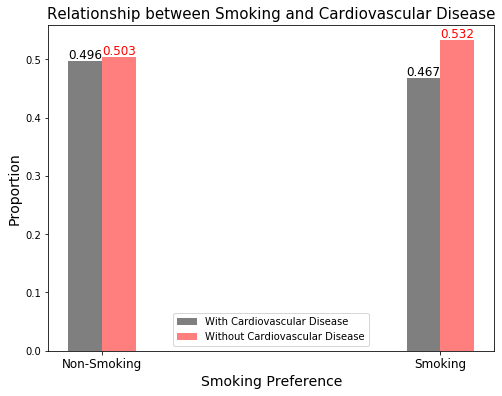

In [13]:
#Making the grouped bar charts with labels
per1=['0.496','0.467']
per2=['0.503','0.532']

labels = ['Non-Smoking','Smoking']
y_value1 = table2['cardio_per'] # List of y-values from 1st category
y_value2 = table2['nocard_per'] # List of y-values from 2nd category
#y_value3 = table['high_per'] # List of y-values from 2nd category


x = np.arange(len(labels))
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x - width/2, y_value1, width, label='With Cardiovascular Disease', color='black', alpha=0.5)
ax.bar(x + width/2, y_value2, width, label='Without Cardiovascular Disease', color='r',alpha=0.5)
#ax.bar(x + width*3/2, y_value3, width, label='High Cholesterol Level', color='Black')


ax.set_ylabel('Proportion', fontsize=14)
ax.set_xlabel('Smoking Preference', fontsize=14)
ax.set_title('Relationship between Smoking and Cardiovascular Disease'
             ,fontsize=15)

for i in range(2):
    plt.text(i-0.10, y_value1[i]+0.005, str(per1[i]), color='black', size=12)

for i in range(2):
    plt.text(i, y_value2[i]+0.005, str(per2[i]), color='red', size=12, alpha=1)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend()
plt.show()

In [14]:
#getting two datasets with and without cardiovascular disease

dfcd=df[df['cardio']==1]
dfnocd=df[df['cardio']==0]

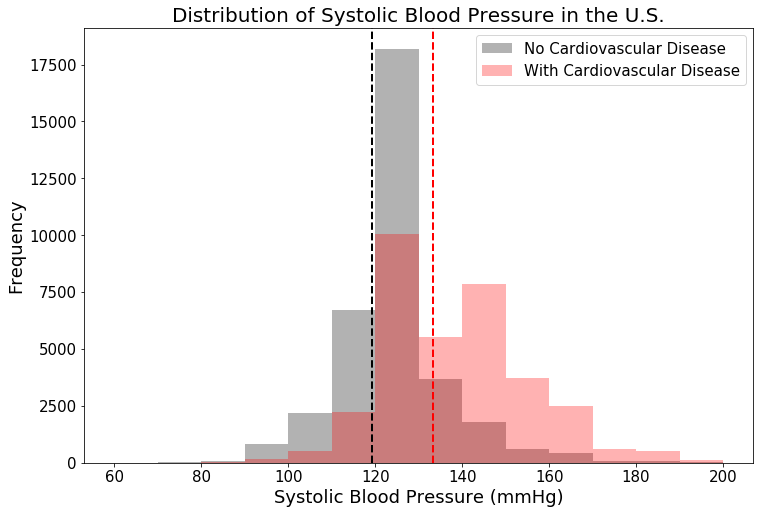

In [15]:
#making a grouped histogram for systolic blood pressure

fig, axs = plt.subplots(figsize=(12,8))
axs.hist(dfnocd['ap_hi'], color="Black", alpha=0.3,
         bins=np.linspace(60,200,15), label='No Cardiovascular Disease')
axs.hist(dfcd['ap_hi'], color="r", alpha=0.3 ,
         bins=np.linspace(60,200,15), label='With Cardiovascular Disease')

plt.title("Distribution of Systolic Blood Pressure in the U.S.", fontsize=20)
axs.set_xlabel("Systolic Blood Pressure (mmHg)", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})

axs.axvline(np.mean(dfcd['ap_hi']), color='r', ls='dashed', lw=2)
axs.axvline(np.mean(dfnocd['ap_hi']), color='Black', ls='dashed', lw=2)

plt.show()

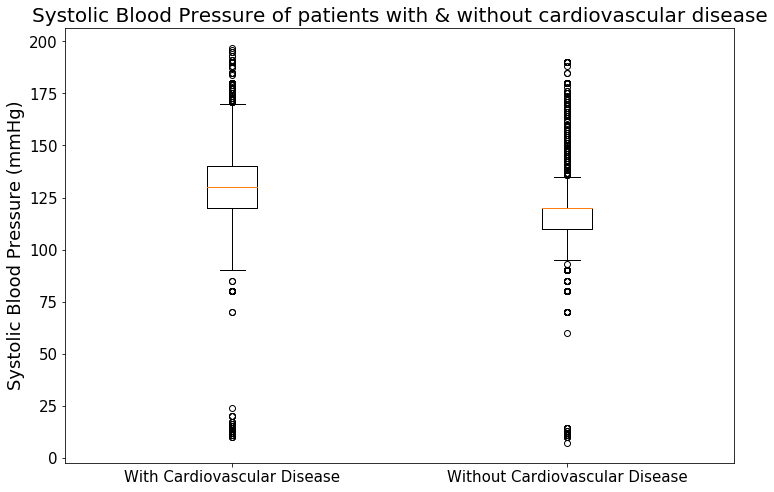

In [16]:
#making a grouped boxplot for systolic blood pressure

fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([dfcd['ap_hi'], dfnocd['ap_hi']])
plt.title('Systolic Blood Pressure of patients with & without cardiovascular disease', fontsize=20)
axs.set_xticklabels(['With Cardiovascular Disease','Without Cardiovascular Disease'])
axs.set_ylabel('Systolic Blood Pressure (mmHg)', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [17]:
#printing the CI and P-value

CI_mean(dfcd['ap_hi'])
CI_mean(dfnocd['ap_hi'])
CI_mean_diff(dfcd['ap_hi'],dfnocd['ap_hi'])
t_val, p_val = stats.ttest_ind(dfcd['ap_hi'], dfnocd['ap_hi'], equal_var=False)
print("Test statistic:", t_val)
print("p-value:", p_val) 

Average is: 133.23422019697193
95% CI of mean is: (133.04408439559654, 133.42435599834732)
Average is: 119.2331638953505
95% CI of mean is: (119.0910591898831, 119.3752686008179)
The average difference is: 14.001056301621432
The 95% CI is: (13.763684504053494, 14.23842809918937)
Test statistic: 115.60627923728309
p-value: 0.0


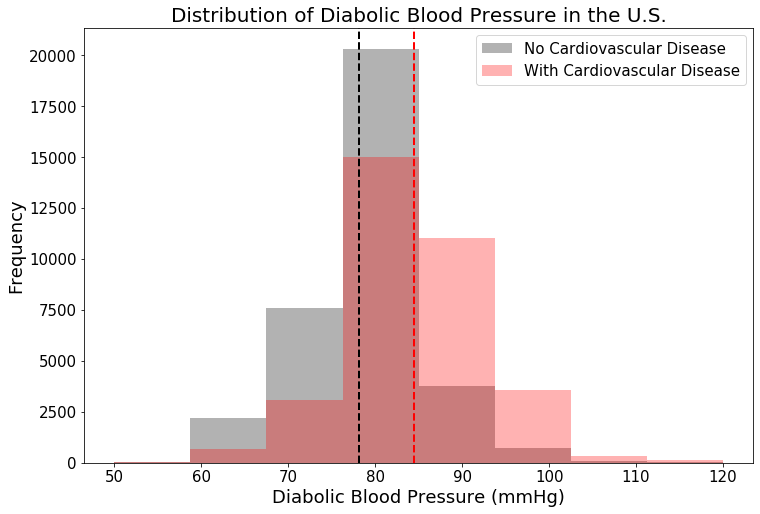

In [18]:
#making a grouped histogram for diabolic blood pressure

fig, axs = plt.subplots(figsize=(12,8))
axs.hist(dfnocd['ap_lo'], color="Black", alpha=0.3,
         bins=np.linspace(50,120,9), label='No Cardiovascular Disease')
axs.hist(dfcd['ap_lo'], color="r", alpha=0.3 ,
         bins=np.linspace(50,120,9), label='With Cardiovascular Disease')

plt.title("Distribution of Diabolic Blood Pressure in the U.S.", fontsize=20)
axs.set_xlabel("Diabolic Blood Pressure (mmHg)", fontsize=18)
axs.set_ylabel("Frequency", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})

axs.axvline(np.mean(dfcd['ap_lo']), color='r', ls='dashed', lw=2)
axs.axvline(np.mean(dfnocd['ap_lo']), color='Black', ls='dashed', lw=2)

plt.show()

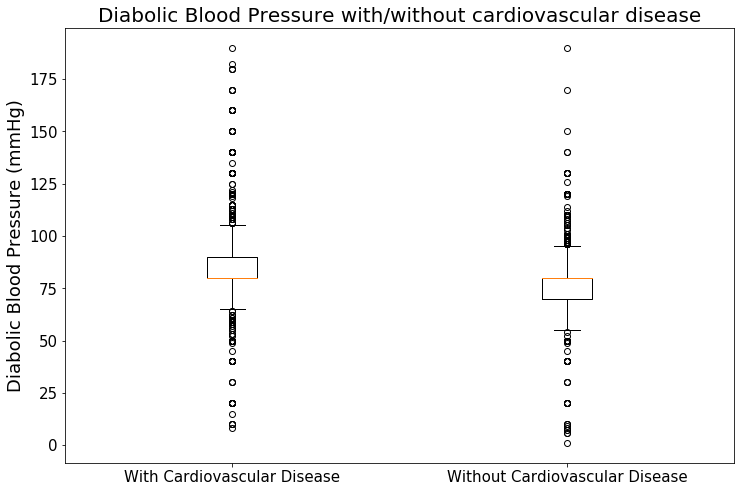

In [19]:
#making a grouped boxplot for Diabolic blood pressure

fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([dfcd['ap_lo'], dfnocd['ap_lo']])
plt.title('Diabolic Blood Pressure with/without cardiovascular disease', fontsize=20)
axs.set_xticklabels(['With Cardiovascular Disease','Without Cardiovascular Disease'])
axs.set_ylabel('Diabolic Blood Pressure (mmHg)', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [20]:
#printing the CI and P-value
CI_mean(dfcd['ap_lo'])
CI_mean(dfnocd['ap_lo'])
CI_mean_diff(dfcd['ap_lo'],dfnocd['ap_lo'])
t_val, p_val = stats.ttest_ind(dfcd['ap_lo'], dfnocd['ap_lo'], equal_var=False)
print("Test statistic:", t_val)
print("p-value:", p_val) 

Average is: 84.52038806408937
95% CI of mean is: (84.41589221960342, 84.62488390857533)
Average is: 78.11797478533069
95% CI of mean is: (78.02992019682875, 78.20602937383262)
The average difference is: 6.4024132787586865
The 95% CI is: (6.265764121896753, 6.53906243562062)
Test statistic: 91.83040442644497
p-value: 0.0
